## Imports

In [1]:
%matplotlib inline
from utils import *
from plotting import *
from models import *
from sklearn.decomposition import PCA

## Datasets dimensionality

In [2]:
tasks = ['openArena', 'detour', 'doubleTmaze', 'cylinder', 'permanence', 'thorndike']

In [3]:
ms = []
bs = []
variances = []
for task in tasks:
    print(task)
    
    dataset, _ = load_dataset('datasets/'+task, file_format='.npy', load_pose=False)
    dataset = dataset[:10000]
        
    n_imgs = dataset.shape[0]
    
    dataset_reduced = PCA().fit(dataset.reshape((n_imgs, int(84*84*3))))
    variances_dataset = dataset_reduced.explained_variance_ratio_
    cum_variances_dataset = np.cumsum(variances_dataset)
    
    cutoff_fit = 2000
    x = np.arange(1, n_imgs+1)
    y = variances_dataset
    m, b = np.polyfit(np.log(x[:cutoff_fit]), np.log(y[:cutoff_fit]), 1)
    
    ms.append(m)
    bs.append(b)
    variances.append(variances_dataset)

openArena
detour
doubleTmaze
cylinder
permanence


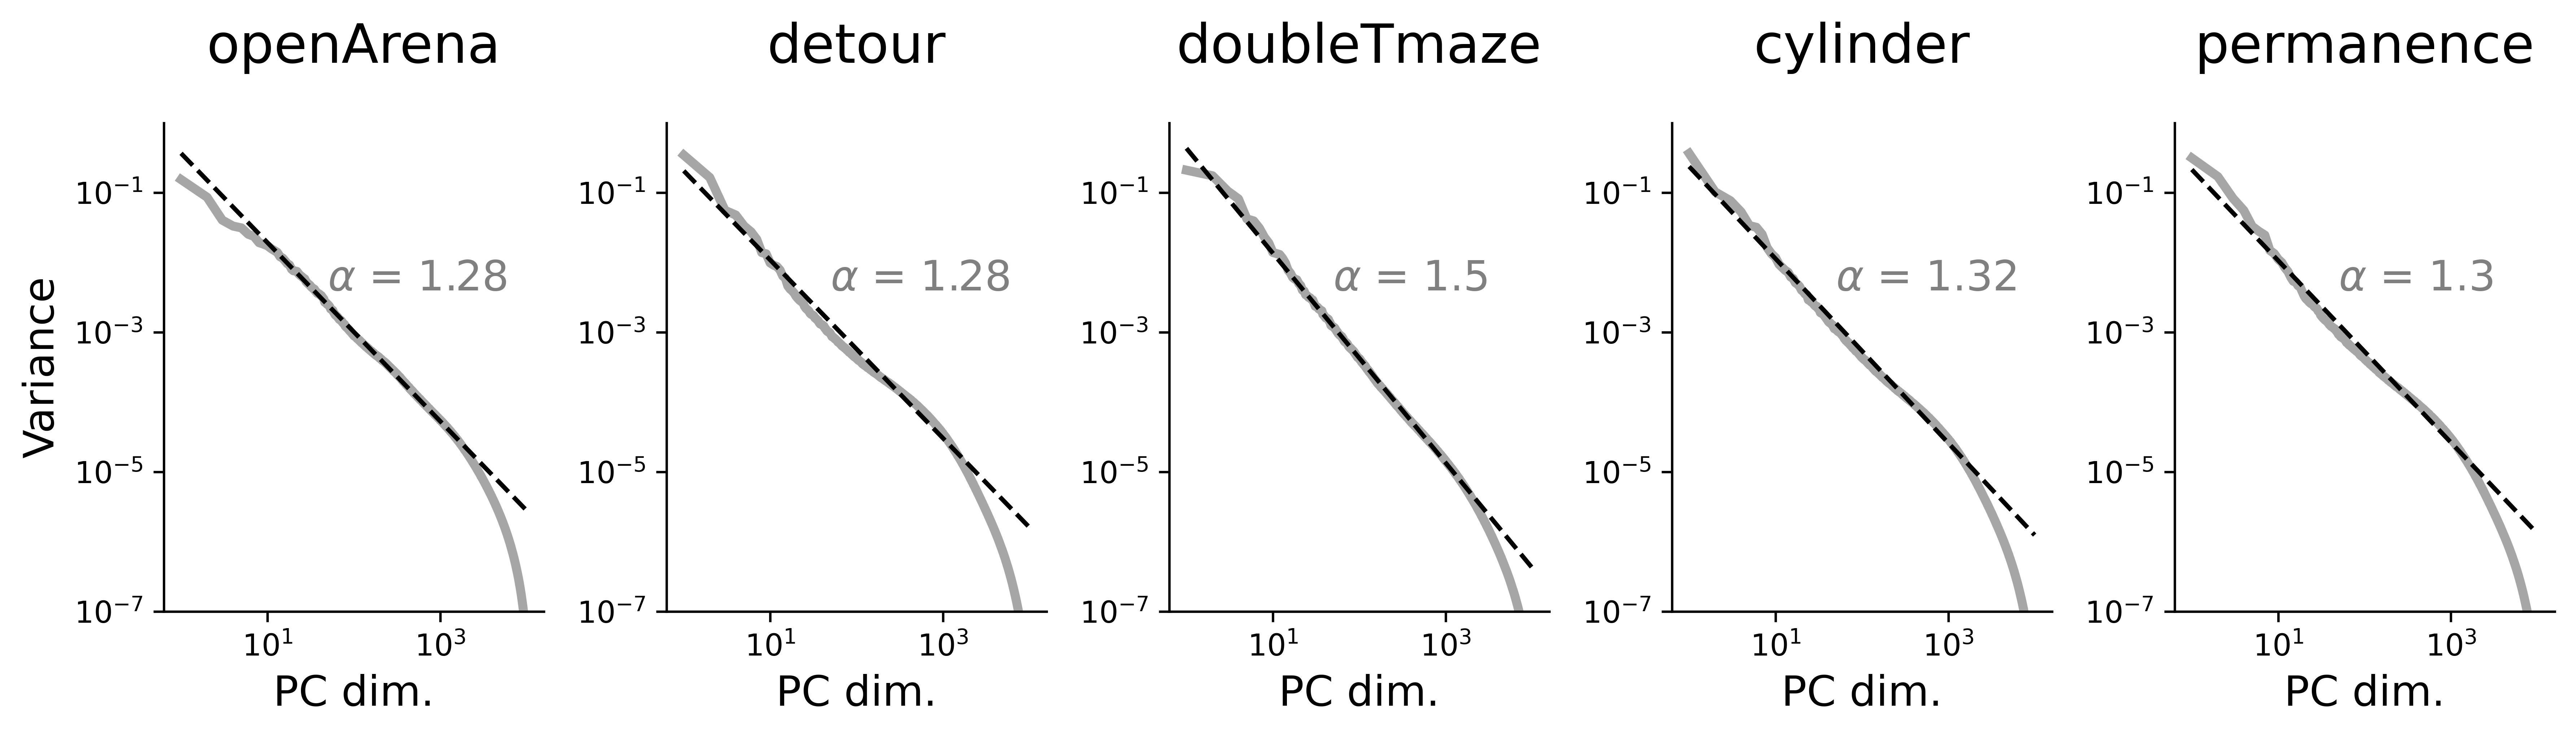

In [12]:
plt.figure(figsize=(12,3.5), dpi=600)

for i, task in enumerate(tasks):
    plt.subplot(1, len(tasks), i+1)

    plt.title(task, fontsize=18, pad=20)

    plt.plot(np.arange(1, len(variances[i])+1), variances[i], color='gray', linewidth=3, alpha=0.7)
    
    x_fit = np.linspace(1, len(variances[i])+1, 100)
    y_fit = np.exp(bs[i]) * x_fit**ms[i]
    plt.plot(x_fit, y_fit, linestyle='--', color='black', linewidth=1.5)
    
    plt.text(x=50, y=4e-3, s='$\u03B1$ = '+str(np.around(-ms[i], 2)), color='gray', fontsize=14)
    if i==0: plt.ylabel('Variance', fontsize=14)
    plt.xlabel('PC dim.', fontsize=14)
    plt.xscale('log')
    plt.yscale('log')
    #plt.xlim(1, 1e3)
    plt.ylim(1e-7, 1e-0)

    sb.despine()

plt.tight_layout()

plt.savefig('plots/powerlaw_environments.png', dpi=600)

plt.show()